In [1]:
import pandas as pd
import os
data = pd.read_csv(r'C:\Users\1100634\Downloads\deliveries.csv')

data.head()

,match_id,match_year,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [2]:
print("\nData types and non-null counts:")
print(data.info())

print("\nMissing values in each column:")
print(data.isnull().sum())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   match_year        260920 non-null  int64 
 2   inning            260920 non-null  int64 
 3   batting_team      260920 non-null  object
 4   bowling_team      260920 non-null  object
 5   over              260920 non-null  int64 
 6   ball              260920 non-null  int64 
 7   batter            260920 non-null  object
 8   bowler            260920 non-null  object
 9   non_striker       260920 non-null  object
 10  batsman_runs      260920 non-null  int64 
 11  extra_runs        260920 non-null  int64 
 12  total_runs        260920 non-null  int64 
 13  extras_type       14125 non-null   object
 14  is_wicket         260920 non-null  int64 
 15  player_dismissed  12950 non-null   object
 16  dismi

In [3]:
data['extras_type'].fillna("No Extra", inplace=True)


data['player_dismissed'].fillna("Not Out", inplace=True)
data['dismissal_kind'].fillna("Not Out", inplace=True)
data['fielder'].fillna("Not Out", inplace=True)


print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
match_id            0
match_year          0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [4]:
num_matches = data['match_id'].nunique()
num_innings = data['inning'].nunique()
num_teams = data['batting_team'].nunique()


num_players = data['batter'].nunique() + data['bowler'].nunique()
num_batters = data['batter'].nunique()
num_bowlers = data['bowler'].nunique()

print(f"Total Matches: {num_matches}")
print(f"Total Innings: {num_innings}")
print(f"Total Teams: {num_teams}")
print(f"Total Players: {num_players}")
print(f"Total Batters: {num_batters}")
print(f"Total Bowlers: {num_bowlers}")


Total Matches: 1095
Total Innings: 6
Total Teams: 19
Total Players: 1203
Total Batters: 673
Total Bowlers: 530


In [5]:
# Top 10 players by total runs scored
top_scorers = data.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
print("Top 10 Run-Scorers:\n", top_scorers)

Top 10 Run-Scorers:
 batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


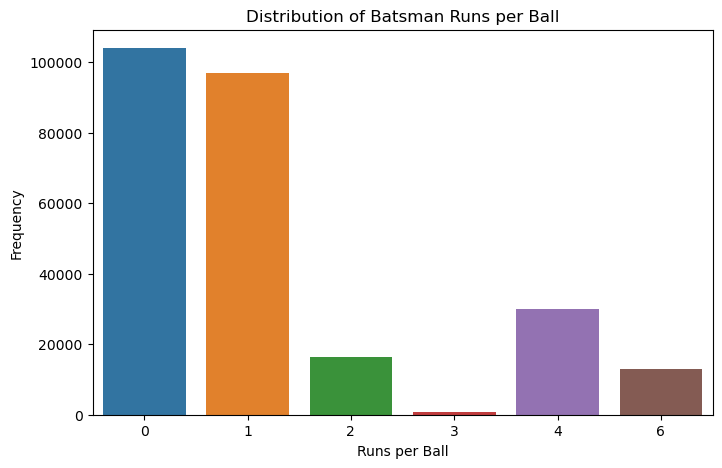

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of batsman runs
plt.figure(figsize=(8, 5))
sns.countplot(x='batsman_runs', data=data, order=[0, 1, 2, 3, 4, 6])
plt.title('Distribution of Batsman Runs per Ball')
plt.xlabel('Runs per Ball')
plt.ylabel('Frequency')
plt.show()

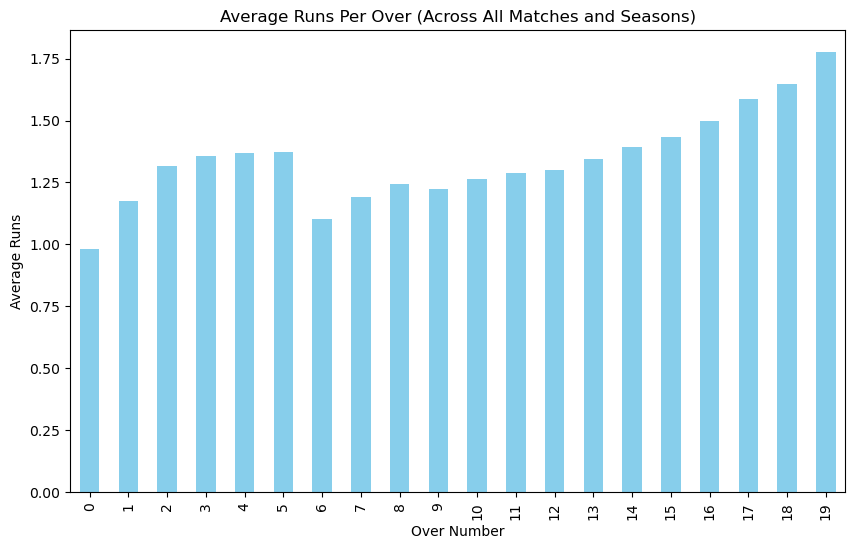

In [7]:
# Calculate total runs per over across all matches and seasons
average_runs_per_over = data.groupby('over')['total_runs'].mean()

# Plotting the trend
plt.figure(figsize=(10, 6))
average_runs_per_over.plot(kind='bar', color='skyblue')
plt.title('Average Runs Per Over (Across All Matches and Seasons)')
plt.xlabel('Over Number')
plt.ylabel('Average Runs')
plt.show()

In [8]:
average_runs_per_over = data.groupby('over')['batsman_runs'].mean()
average_runs_per_match = data.groupby('match_id')['batsman_runs'].sum().mean()
average_runs_per_team = data.groupby('batting_team')['batsman_runs'].sum().mean()

print(f"Average Runs per Over: {average_runs_per_over.mean()}")
print(f"Average Runs per Match: {average_runs_per_match}")
print(f"Average Runs per Team: {average_runs_per_team}")

Average Runs per Over: 1.2747369158530888
Average Runs per Match: 301.4283105022831
Average Runs per Team: 17371.78947368421


In [9]:
extra_counts = data['extras_type'].value_counts()

# Display the counts of each extra type
print("\nCount of Each Extra Type:")
print(extra_counts)


Count of Each Extra Type:
No Extra    246795
wides         8380
legbyes       4001
noballs       1069
byes           673
penalty          2
Name: extras_type, dtype: int64


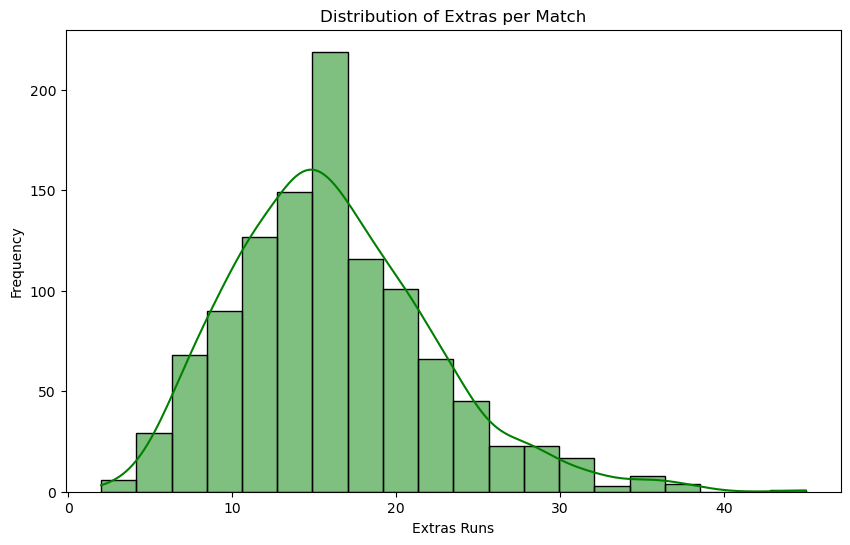

In [10]:
extras_per_match = data.groupby('match_id')['extra_runs'].sum()

# Plotting the distribution of extras per match
plt.figure(figsize=(10, 6))
sns.histplot(extras_per_match, bins=20, kde=True, color='green')
plt.title("Distribution of Extras per Match")
plt.xlabel("Extras Runs")
plt.ylabel("Frequency")
plt.show()

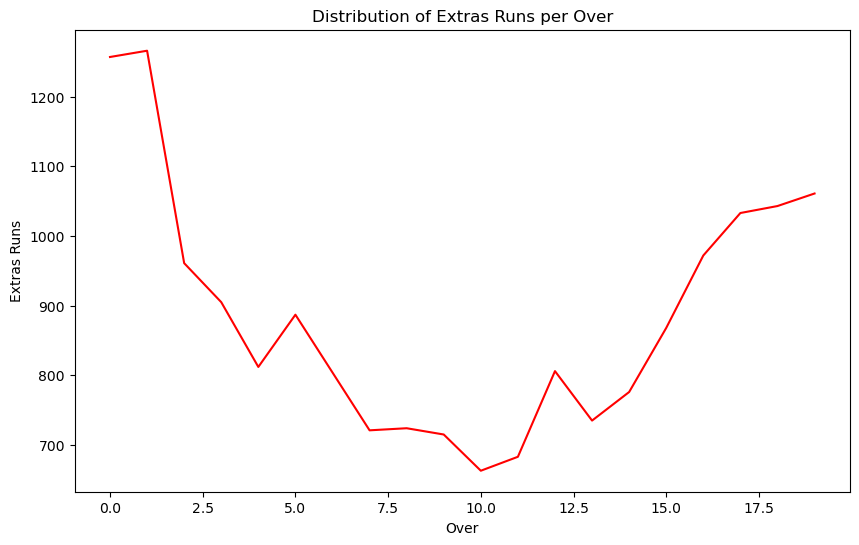

In [11]:
extras_per_over = data.groupby('over')['extra_runs'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=extras_per_over.index, y=extras_per_over.values, color='red')
plt.title("Distribution of Extras Runs per Over")
plt.xlabel("Over")
plt.ylabel("Extras Runs")
plt.show()

In [12]:
#Total dismissals by type
dismissal_counts = data['dismissal_kind'].value_counts()

# Display the dismissal type counts
print("\nTotal Dismissals by Type:")
print(dismissal_counts)


Total Dismissals by Type:
Not Out                  247970
caught                     8063
bowled                     2212
run out                    1114
lbw                         800
caught and bowled           367
stumped                     358
retired hurt                 15
hit wicket                   15
obstructing the field         3
retired out                   3
Name: dismissal_kind, dtype: int64


In [13]:
dismissals_by_player = data[data['dismissal_kind'] != "Not Out"].groupby('player_dismissed')['dismissal_kind'].count().reset_index()
dismissals_by_player = dismissals_by_player.sort_values(by='dismissal_kind', ascending=False)

top_dismissed_players = dismissals_by_player.head(10)
print("\nTop 10 Players with Most Dismissals:")
print(top_dismissed_players)


Top 10 Players with Most Dismissals:
    player_dismissed  dismissal_kind
447        RG Sharma             223
590          V Kohli             207
478         S Dhawan             193
263       KD Karthik             184
467       RV Uthappa             180
511         SK Raina             171
138        DA Warner             164
60         AT Rayudu             155
47         AM Rahane             154
536        SV Samson             144


In [14]:
wickets_by_bowler = data[data['dismissal_kind'] != "Not Out"].groupby('bowler')['dismissal_kind'].count().reset_index()
wickets_by_bowler = wickets_by_bowler.sort_values(by='dismissal_kind', ascending=False)

# Top 10 bowlers with the most wickets
top_bowlers = wickets_by_bowler.head(10)
print("\nTop 10 Bowlers with Most Wickets:")
print(top_bowlers)


Top 10 Bowlers with Most Wickets:
         bowler  dismissal_kind
449   YS Chahal             213
104    DJ Bravo             207
301   PP Chawla             201
383   SP Narine             200
308    R Ashwin             198
63      B Kumar             195
376  SL Malinga             188
7      A Mishra             183
171   JJ Bumrah             182
323   RA Jadeja             169


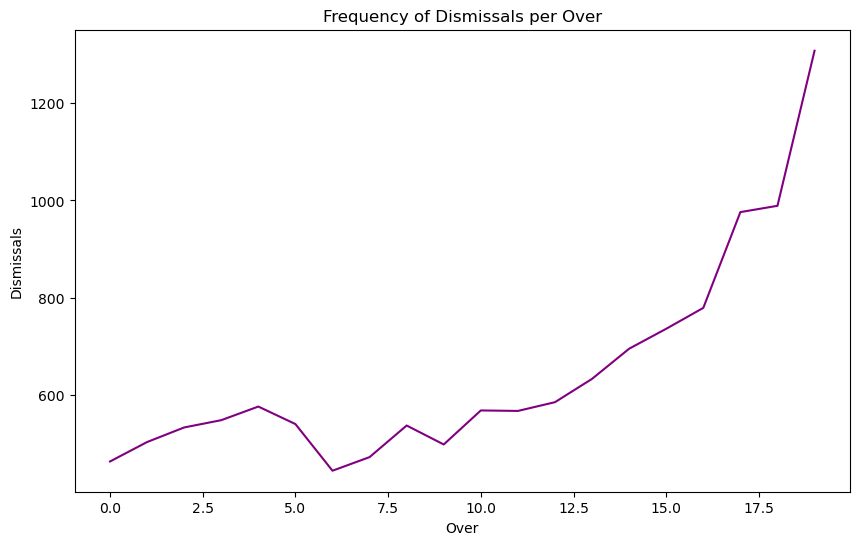

In [15]:
dismissals_per_over = data[data['dismissal_kind'] != "Not Out"].groupby('over')['dismissal_kind'].count()

#Frequency of dismissals per over
plt.figure(figsize=(10, 6))
sns.lineplot(x=dismissals_per_over.index, y=dismissals_per_over.values, color='purple')
plt.title("Frequency of Dismissals per Over")
plt.xlabel("Over")
plt.ylabel("Dismissals")
plt.show()

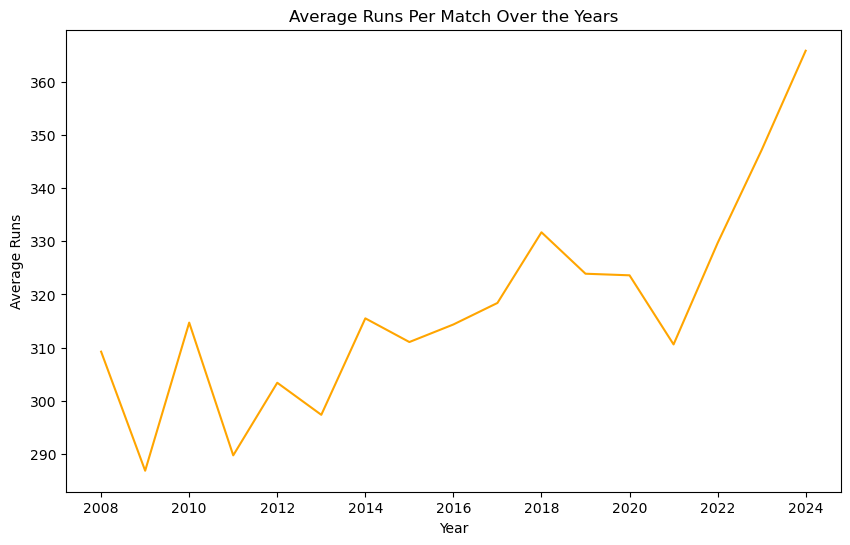

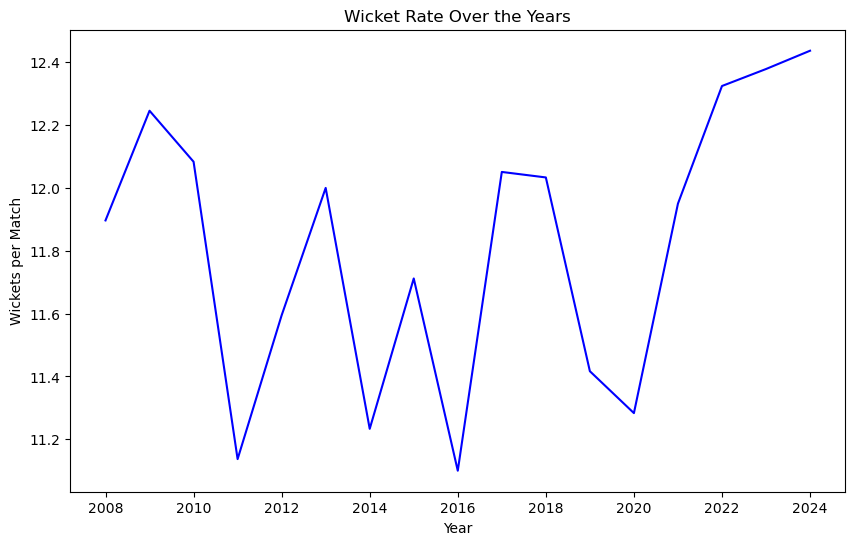

In [16]:
average_runs_per_match = data.groupby('match_year')['total_runs'].sum() / data.groupby('match_year')['match_id'].nunique()

#Wicket rates over the years
wickets_per_year = data[data['dismissal_kind'] != "Not Out"].groupby('match_year')['dismissal_kind'].count() / data.groupby('match_year')['match_id'].nunique()

# The average runs per match over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_runs_per_match.index, y=average_runs_per_match.values, color='orange')
plt.title("Average Runs Per Match Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Runs")
plt.show()

#The wicket rate over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=wickets_per_year.index, y=wickets_per_year.values, color='blue')
plt.title("Wicket Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Wickets per Match")
plt.show()

In [17]:
# Aggregating player performance, considering matches
player_performance = data.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),  # Total runs scored by each player
    matches_played=('match_id', 'nunique'),  # Count of unique matches per player
    balls_faced=('batsman_runs', 'count'),  # Total balls faced by the player
    total_dismissals=('player_dismissed', lambda x: (x.notnull()).sum())  # Count dismissals
).reset_index()

# Calculating average runs per match
player_performance['average_runs_per_match'] = player_performance['total_runs'] / player_performance['matches_played']

# Calculating strike rate per match
player_performance['strike_rate_per_match'] = (player_performance['total_runs'] / player_performance['balls_faced']) * 100

# Display the first few rows
print(player_performance.head())


           batter  total_runs  matches_played  balls_faced  total_dismissals  \
0  A Ashish Reddy         280              23          196               196   
1        A Badoni         634              35          505               505   
2      A Chandila           4               2            7                 7   
3        A Chopra          53               6           75                75   
4     A Choudhary          25               3           20                20   

   average_runs_per_match  strike_rate_per_match  
0               12.173913             142.857143  
1               18.114286             125.544554  
2                2.000000              57.142857  
3                8.833333              70.666667  
4                8.333333             125.000000  


In [18]:
# Get the top 3 batters based on total runs
top_batters = player_performance.nlargest(3, 'total_runs')

# Display the top 3 batters
print(top_batters)


        batter  total_runs  matches_played  balls_faced  total_dismissals  \
631    V Kohli        8014             244         6236              6236   
512   S Dhawan        6769             221         5483              5483   
477  RG Sharma        6630             251         5183              5183   

     average_runs_per_match  strike_rate_per_match  
631               32.844262             128.511867  
512               30.628959             123.454313  
477               26.414343             127.918194  


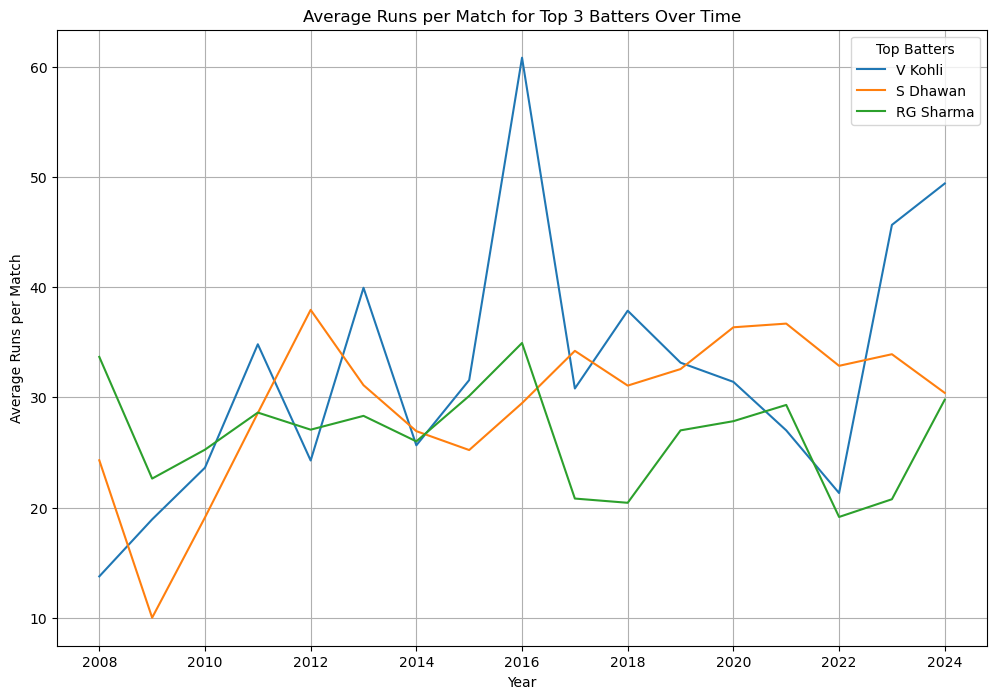

In [19]:
import matplotlib.pyplot as plt

# Filter the data for the top 3 batters
top_batters_data = data[data['batter'].isin(top_batters['batter'])]

# Create a plot for each of the top 3 batters showing their runs per match over the years
plt.figure(figsize=(12, 8))
for batter in top_batters['batter']:
    batter_data = top_batters_data[top_batters_data['batter'] == batter]
    yearly_runs = batter_data.groupby('match_year').agg(
        total_runs=('batsman_runs', 'sum'),
        matches_played=('match_id', 'nunique')
    ).reset_index()
    
    yearly_runs['average_runs_per_match'] = yearly_runs['total_runs'] / yearly_runs['matches_played']
    
    # Plot the average runs per match over the years for each batter
    plt.plot(yearly_runs['match_year'], yearly_runs['average_runs_per_match'], label=batter)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Runs per Match')
plt.title('Average Runs per Match for Top 3 Batters Over Time')
plt.legend(title='Top Batters')
plt.grid(True)
plt.show()


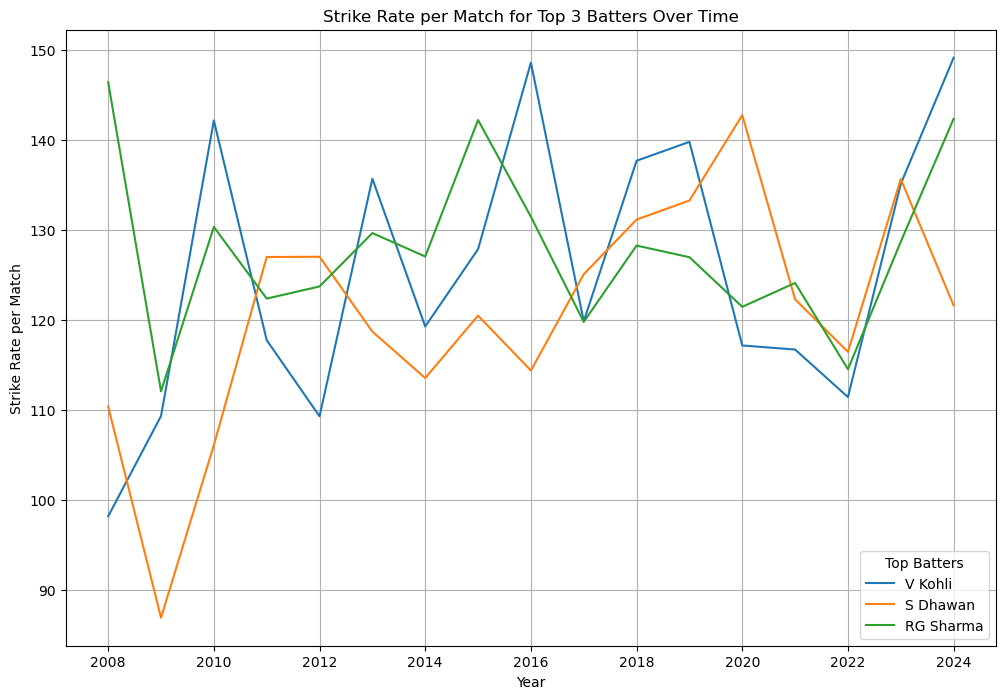

In [20]:
# Create a plot for each of the top 3 batters showing their strike rate per match over the years
plt.figure(figsize=(12, 8))
for batter in top_batters['batter']:
    batter_data = top_batters_data[top_batters_data['batter'] == batter]
    yearly_runs = batter_data.groupby('match_year').agg(
        total_runs=('batsman_runs', 'sum'),
        balls_faced=('batsman_runs', 'count')
    ).reset_index()
    
    yearly_runs['strike_rate_per_match'] = (yearly_runs['total_runs'] / yearly_runs['balls_faced']) * 100
    
    # Plot the strike rate per match over the years for each batter
    plt.plot(yearly_runs['match_year'], yearly_runs['strike_rate_per_match'], label=batter)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Strike Rate per Match')
plt.title('Strike Rate per Match for Top 3 Batters Over Time')
plt.legend(title='Top Batters')
plt.grid(True)
plt.show()


In [21]:
# Group data by batter and match_id to calculate total runs in each match
batter_performance = data.groupby(['batter', 'match_id'])['batsman_runs'].sum().reset_index()

# Calculate mean and standard deviation of runs per match for each batter
consistency = batter_performance.groupby('batter')['batsman_runs'].agg(['mean', 'std']).reset_index()
consistency.rename(columns={'mean': 'Average Runs per Match', 'std': 'Standard Deviation'}, inplace=True)

# Display consistency for the top 3 batters
top_3_batters = ['V Kohli', 'S Dhawan', 'RG Sharma', 'DA Warner', 'AB de Villiers', 'MS Dhoni']
print(consistency[consistency['batter'].isin(top_3_batters)])

             batter  Average Runs per Match  Standard Deviation
30   AB de Villiers               30.476471           27.627318
147       DA Warner               35.690217           28.974206
374        MS Dhoni               22.995614           18.281812
477       RG Sharma               26.414343           23.922450
512        S Dhawan               30.628959           25.375326
631         V Kohli               32.844262           27.473300


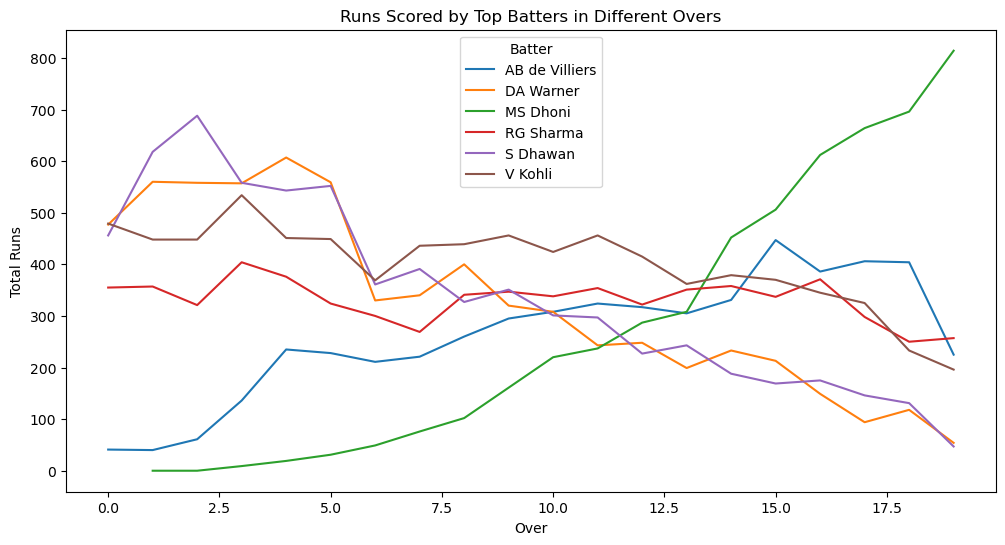

In [22]:
# Group data by batter and over to calculate total runs scored in each over
over_analysis = data.groupby(['batter', 'over'])['batsman_runs'].sum().reset_index()

# Filter data for the top 3 batters
over_analysis_top = over_analysis[over_analysis['batter'].isin(top_3_batters)]

# Visualize the performance of each batter in different overs
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=over_analysis_top, x='over', y='batsman_runs', hue='batter')
plt.title('Runs Scored by Top Batters in Different Overs')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.legend(title='Batter')
plt.show()


In [23]:
# Calculate strike rate: (Total Runs / Total Balls Faced) * 100
strike_rate = data.groupby('batter')['batsman_runs'].sum() / data.groupby('batter').size() * 100

# Calculate boundaries: Filter rows where runs are 4 or 6
boundaries = data[data['batsman_runs'].isin([4, 6])]
boundary_counts = boundaries.groupby('batter')['batsman_runs'].count().reset_index()
boundary_counts.rename(columns={'batsman_runs': 'Boundary Count'}, inplace=True)

# Merge strike rate and boundary data
performance = pd.DataFrame({'Strike Rate': strike_rate}).reset_index()
performance = performance.merge(boundary_counts, on='batter', how='left')

# Display performance for top 3 batters
print(performance[performance['batter'].isin(top_3_batters)])


             batter  Strike Rate  Boundary Count
30   AB de Villiers   148.580442           667.0
147       DA Warner   135.429986           899.0
374        MS Dhoni   132.835065           615.0
477       RG Sharma   127.918194           880.0
512        S Dhawan   123.454313           921.0
631         V Kohli   128.511867           981.0


In [24]:
# List of the top 5 batters
top_batters = ['V Kohli', 'S Dhawan', 'RG Sharma', 'AB de Villiers', 'MS Dhoni']

# Filter the dataset to only include rows where the batter is in the top 5 batters
filtered_data = data[data['batter'].isin(top_batters)]


In [25]:
# Group by batter and bowler to calculate total runs scored against each bowler
runs_by_bowler = filtered_data.groupby(['batter', 'bowler'])['batsman_runs'].sum().reset_index()

# For each batter, get the top 5 bowlers based on the most runs scored
top_5_bowlers_by_runs = runs_by_bowler.groupby('batter').apply(lambda x: x.nlargest(5, 'batsman_runs')).reset_index(drop=True)

# Display the top 5 bowlers for each batter based on runs
print(top_5_bowlers_by_runs)




            batter           bowler  batsman_runs
0   AB de Villiers        JJ Bumrah           131
1   AB de Villiers       SL Malinga           124
2   AB de Villiers        RA Jadeja           111
3   AB de Villiers  Harbhajan Singh           110
4   AB de Villiers   Sandeep Sharma           107
5         MS Dhoni         DW Steyn           111
6         MS Dhoni       JD Unadkat           105
7         MS Dhoni       KA Pollard           100
8         MS Dhoni        YS Chahal           100
9         MS Dhoni          PP Ojha            98
10       RG Sharma         UT Yadav           170
11       RG Sharma        PP Chawla           146
12       RG Sharma        SP Narine           143
13       RG Sharma         M Morkel           119
14       RG Sharma         R Ashwin           105
15        S Dhawan  Harbhajan Singh           147
16        S Dhawan         DJ Bravo           132
17        S Dhawan      DS Kulkarni           127
18        S Dhawan        RA Jadeja           119


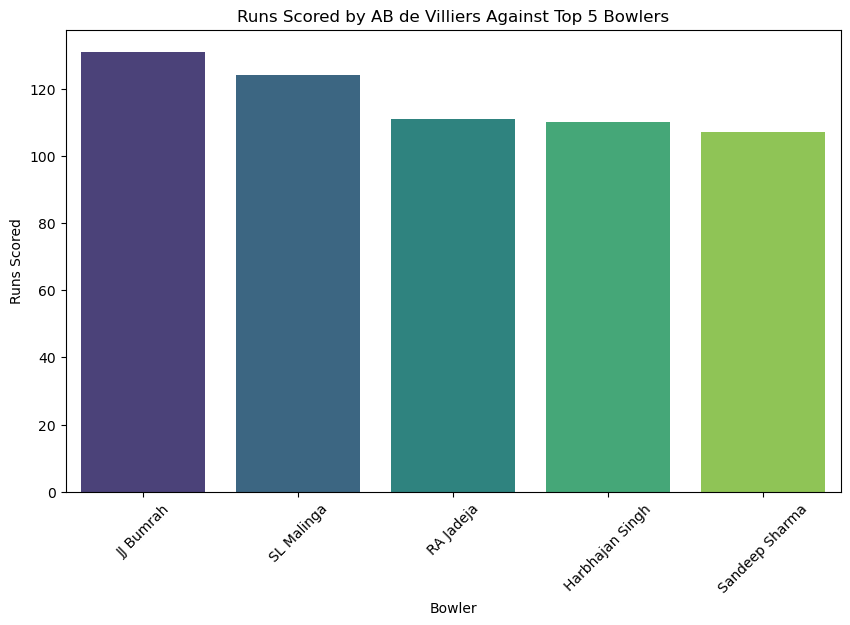

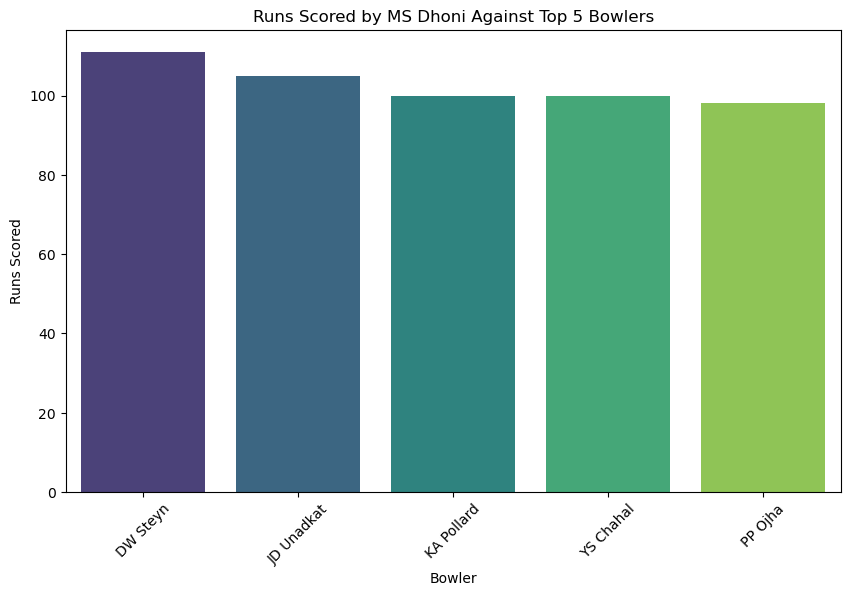

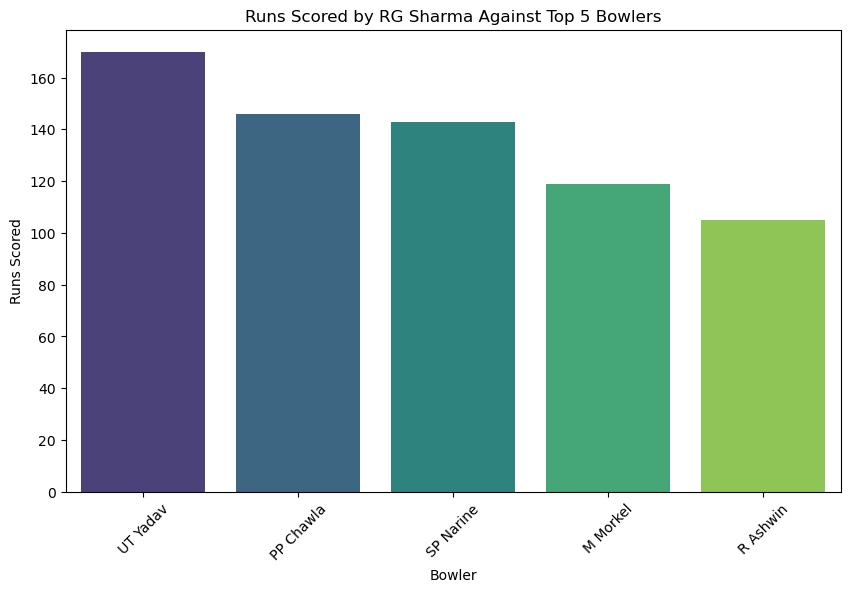

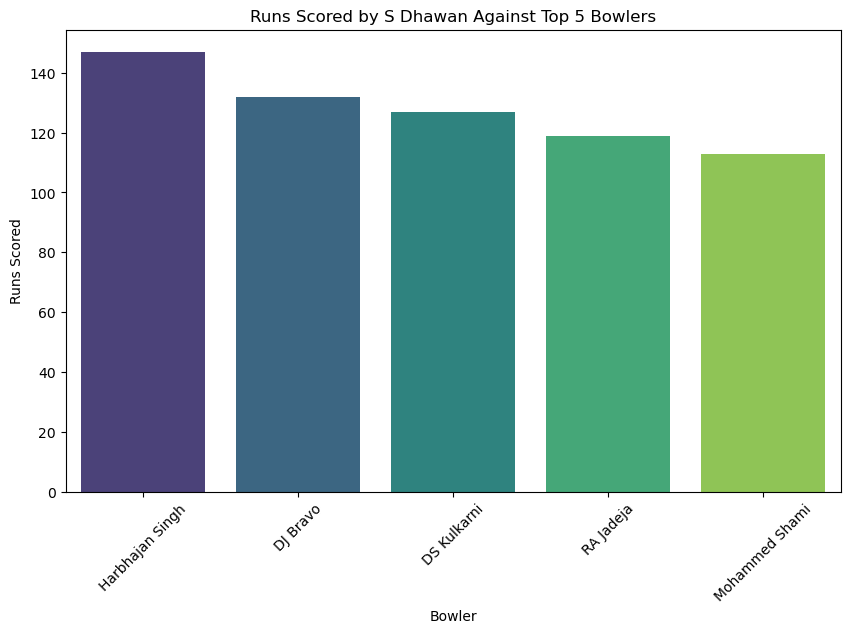

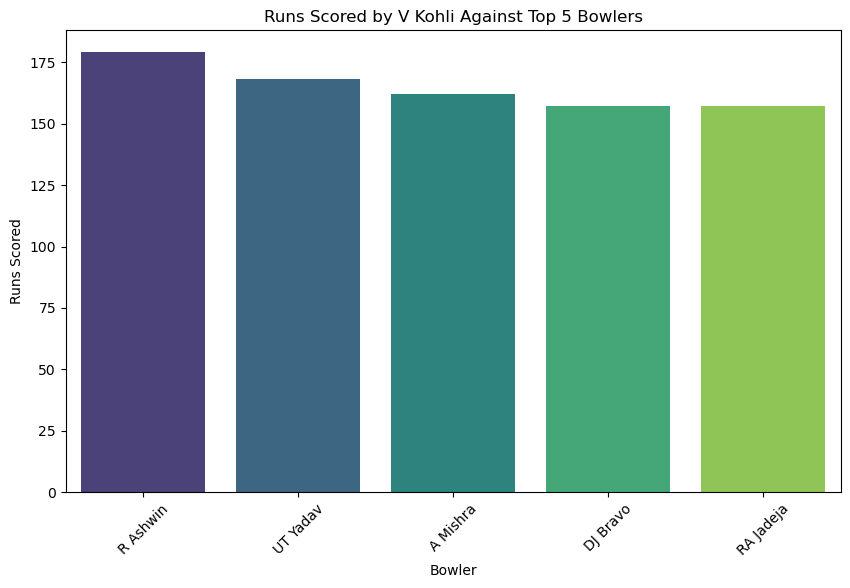

In [26]:

# Plotting Runs Scored by Each Batter against Top 5 Bowlers
for batter in top_5_bowlers_by_runs['batter'].unique():
    # Filter the data for the current batter
    batter_data = top_5_bowlers_by_runs[top_5_bowlers_by_runs['batter'] == batter]

    # Create a bar plot for runs scored against top 5 bowlers
    plt.figure(figsize=(10, 6))
    sns.barplot(data=batter_data, x='bowler', y='batsman_runs', palette='viridis')
    plt.title(f'Runs Scored by {batter} Against Top 5 Bowlers')
    plt.xlabel('Bowler')
    plt.ylabel('Runs Scored')
    plt.xticks(rotation=45)
    plt.show()

In [27]:
# Group by batter and bowler to count the dismissals
dismissals_by_bowler = filtered_data[filtered_data['player_dismissed'] != 'Not Out'].groupby(['batter', 'bowler'])['player_dismissed'].count().reset_index()

# For each batter, get the top 5 bowlers based on the most dismissals
top_5_bowlers_by_dismissals = dismissals_by_bowler.groupby('batter').apply(lambda x: x.nlargest(5, 'player_dismissed')).reset_index(drop=True)

# Display the top 5 bowlers for each batter based on dismissals
print(top_5_bowlers_by_dismissals)


            batter           bowler  player_dismissed
0   AB de Villiers        KH Pandya                 4
1   AB de Villiers        PP Chawla                 4
2   AB de Villiers          S Gopal                 4
3   AB de Villiers        SP Narine                 4
4   AB de Villiers          B Kumar                 3
5         MS Dhoni          PP Ojha                 7
6         MS Dhoni           Z Khan                 7
7         MS Dhoni         CV Varun                 4
8         MS Dhoni        JJ Bumrah                 4
9         MS Dhoni          A Nehra                 3
10       RG Sharma        SP Narine                 9
11       RG Sharma         A Mishra                 7
12       RG Sharma    R Vinay Kumar                 6
13       RG Sharma       SK Trivedi                 6
14       RG Sharma         DJ Bravo                 5
15        S Dhawan  Harbhajan Singh                 4
16        S Dhawan         I Sharma                 4
17        S Dhawan      JP F

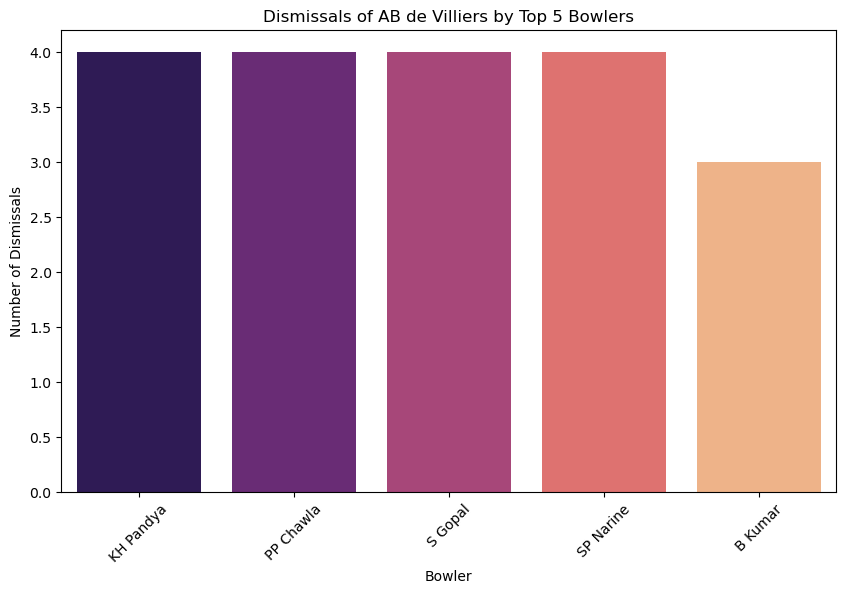

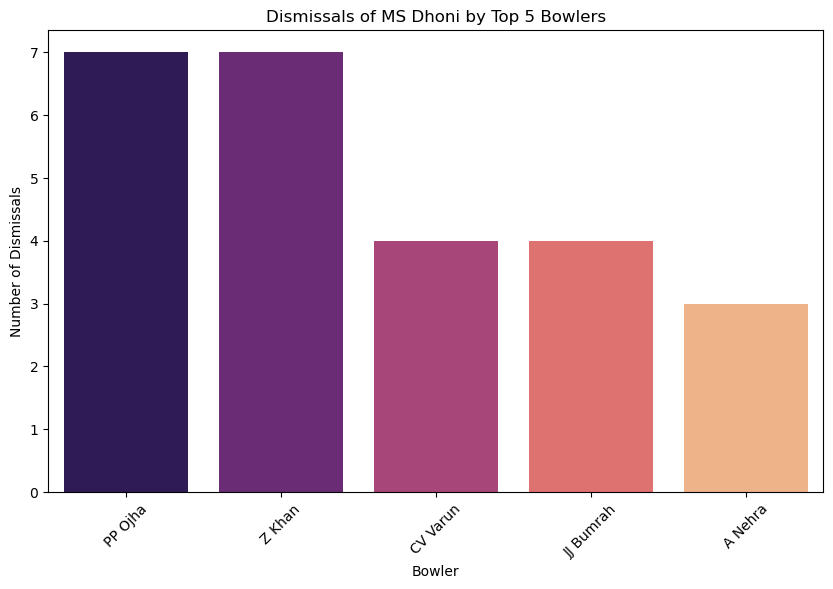

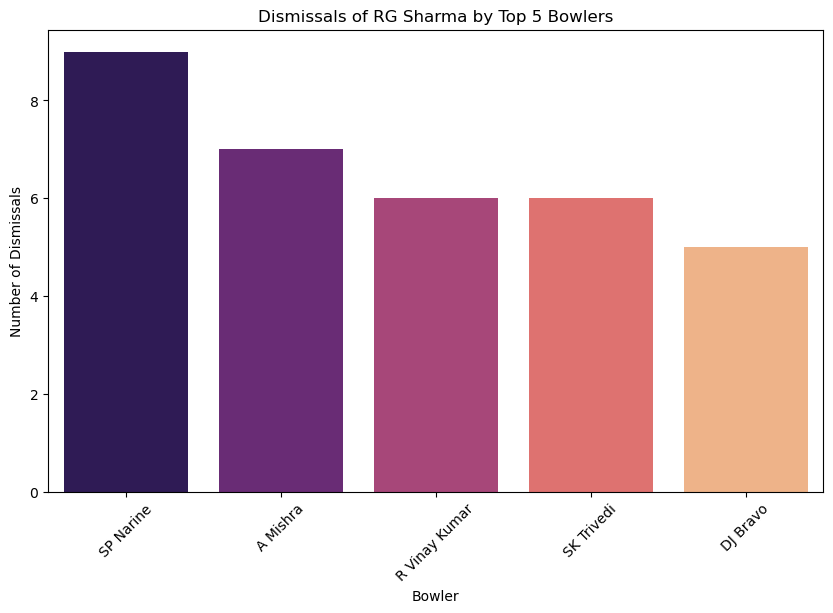

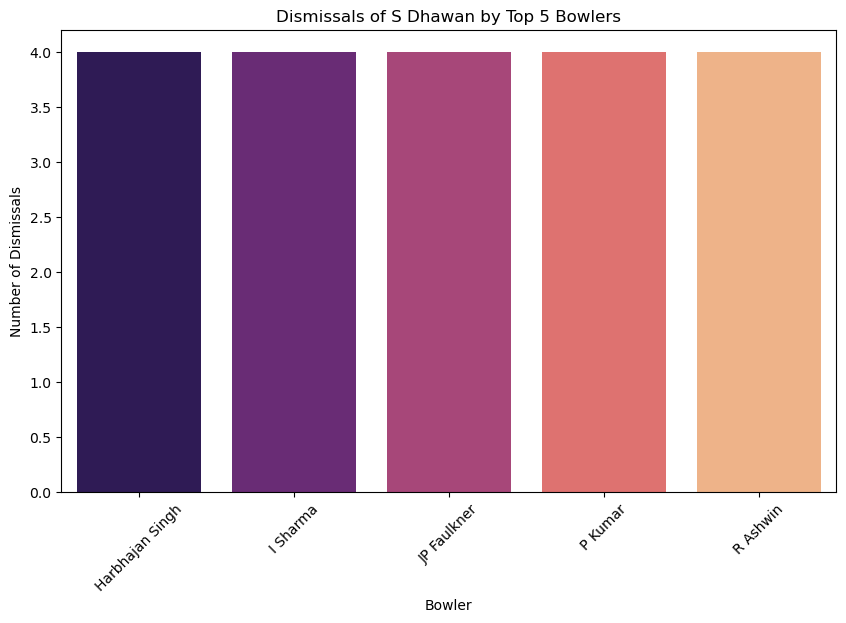

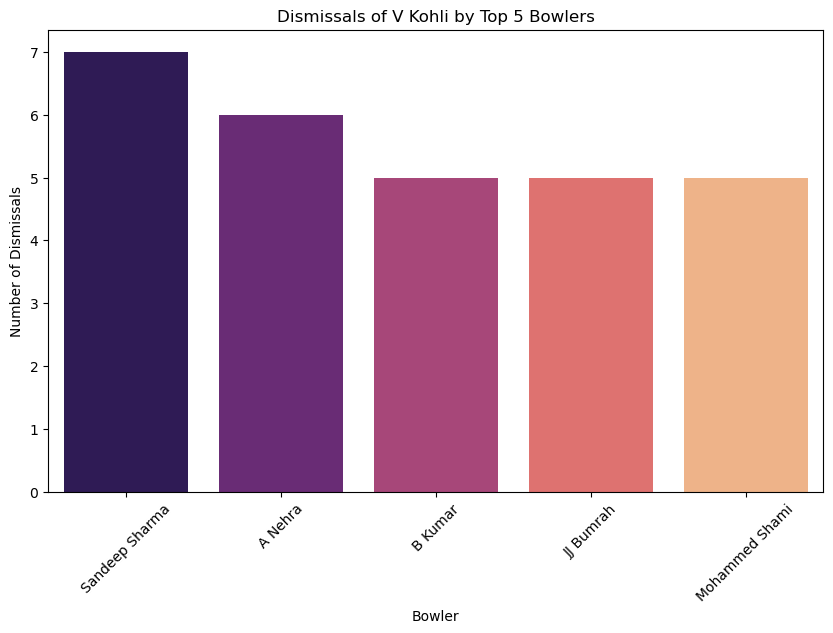

In [28]:
# Plotting Dismissals by Each Batter against Top 5 Bowlers
for batter in top_5_bowlers_by_dismissals['batter'].unique():
    # Filter the data for the current batter
    batter_data = top_5_bowlers_by_dismissals[top_5_bowlers_by_dismissals['batter'] == batter]

    # Create a bar plot for dismissals by top 5 bowlers
    plt.figure(figsize=(10, 6))
    sns.barplot(data=batter_data, x='bowler', y='player_dismissed', palette='magma')
    plt.title(f'Dismissals of {batter} by Top 5 Bowlers')
    plt.xlabel('Bowler')
    plt.ylabel('Number of Dismissals')
    plt.xticks(rotation=45)
    plt.show()



In [29]:
# Filter data for bowler-related information
bowler_data = data[data['is_wicket'] == 1]

# Calculate total runs conceded by each bowler
bowler_runs = data.groupby('bowler')['total_runs'].sum()

# Calculate total wickets for each bowler
total_wickets = bowler_data.groupby('bowler')['is_wicket'].count()

# Calculate total balls bowled by each bowler
total_balls = data.groupby('bowler')['ball'].count()

# Calculate total overs bowled (since 1 over = 6 balls)
total_overs = total_balls / 6

# Calculate Bowling Average (Runs per Wicket)
bowling_average = bowler_runs / total_wickets

# Calculate Economy Rate (Runs per Over)
economy_rate = bowler_runs / total_overs

# Calculate Bowling Strike Rate (Balls per Wicket)
bowling_strike_rate = total_balls / total_wickets

# Prepare a DataFrame for the calculated metrics
bowler_metrics = pd.DataFrame({
    'Total Runs Conceded': bowler_runs,
    'Total Wickets': total_wickets,
    'Total Balls Bowled': total_balls,
    'Total Overs Bowled': total_overs,
    'Bowling Average': bowling_average,
    'Economy Rate': economy_rate,
    'Bowling Strike Rate': bowling_strike_rate
})

# Remove NaN (in case of any bowler with no wickets)
bowler_metrics = bowler_metrics.dropna()

# Sort by Total Wickets for better readability
bowler_metrics = bowler_metrics.sort_values('Total Wickets', ascending=False)

# Show top 10 bowlers by total wickets
print(bowler_metrics.head(10))


            Total Runs Conceded  Total Wickets  Total Balls Bowled  \
bowler                                                               
YS Chahal                  4681          213.0                3628   
DJ Bravo                   4436          207.0                3296   
PP Chawla                  5179          201.0                3895   
SP Narine                  4672          200.0                4146   
R Ashwin                   5435          198.0                4679   
B Kumar                    5051          195.0                4060   
SL Malinga                 3486          188.0                2974   
A Mishra                   4193          183.0                3444   
JJ Bumrah                  3840          182.0                3185   
RA Jadeja                  4917          169.0                3895   

            Total Overs Bowled  Bowling Average  Economy Rate  \
bowler                                                          
YS Chahal           604.66666

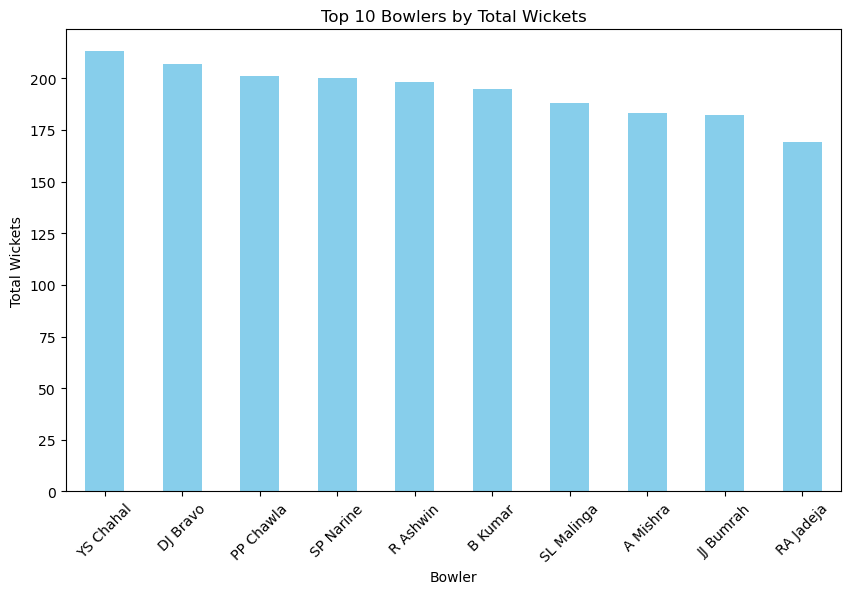

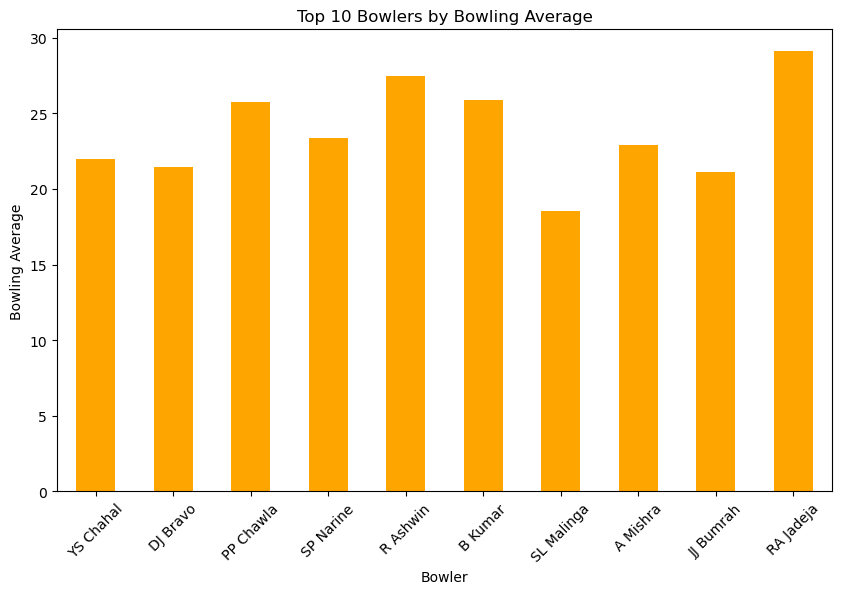

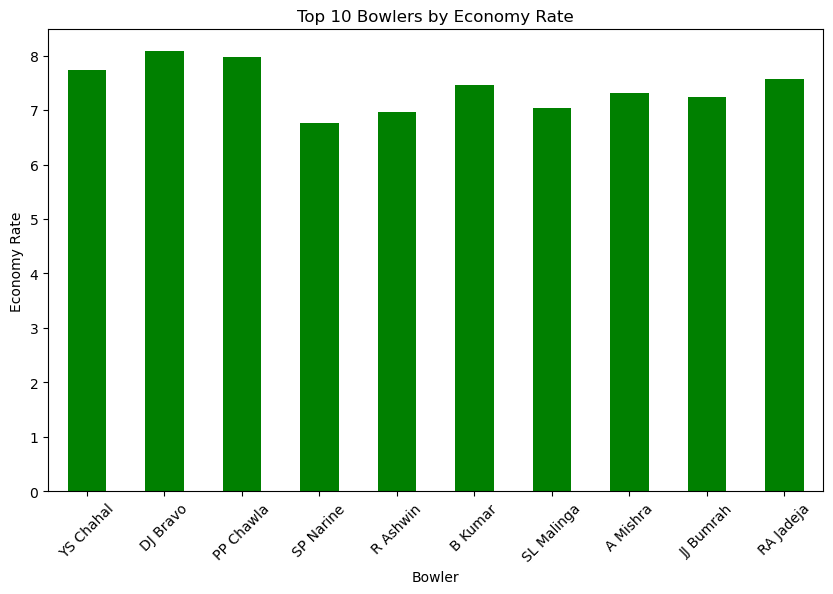

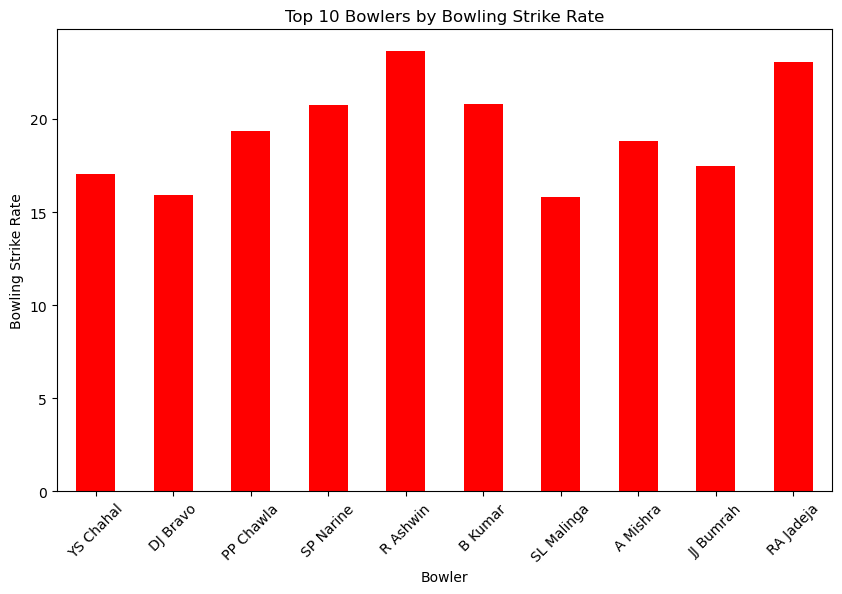

In [30]:
import matplotlib.pyplot as plt

# Plotting Total Wickets
plt.figure(figsize=(10,6))
bowler_metrics['Total Wickets'].head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Bowlers by Total Wickets')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.show()

# Plotting Bowling Average
plt.figure(figsize=(10,6))
bowler_metrics['Bowling Average'].head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Bowlers by Bowling Average')
plt.xlabel('Bowler')
plt.ylabel('Bowling Average')
plt.xticks(rotation=45)
plt.show()

# Plotting Economy Rate
plt.figure(figsize=(10,6))
bowler_metrics['Economy Rate'].head(10).plot(kind='bar', color='green')
plt.title('Top 10 Bowlers by Economy Rate')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45)
plt.show()

# Plotting Bowling Strike Rate
plt.figure(figsize=(10,6))
bowler_metrics['Bowling Strike Rate'].head(10).plot(kind='bar', color='red')
plt.title('Top 10 Bowlers by Bowling Strike Rate')
plt.xlabel('Bowler')
plt.ylabel('Bowling Strike Rate')
plt.xticks(rotation=45)
plt.show()


In [31]:
# Filter data for wickets (only include rows where 'is_wicket' == 1)
bowler_data = data[data['is_wicket'] == 1]

# Calculate total runs conceded by each bowler
bowler_runs = data.groupby('bowler')['total_runs'].sum()

# Calculate total wickets taken by each bowler
total_wickets = bowler_data.groupby('bowler')['is_wicket'].count()

# Calculate total balls bowled by each bowler
total_balls = data.groupby('bowler')['ball'].count()

# Calculate total overs bowled (since 1 over = 6 balls)
total_overs = total_balls / 6

# Calculate Bowling Average (Runs per Wicket)
bowling_average = bowler_runs / total_wickets

# Calculate Economy Rate (Runs per Over)
economy_rate = bowler_runs / total_overs

# Calculate Bowling Strike Rate (Balls per Wicket)
bowling_strike_rate = total_balls / total_wickets

# Prepare a DataFrame with the calculated metrics
bowler_metrics = pd.DataFrame({
    'Total Runs Conceded': bowler_runs,
    'Total Wickets': total_wickets,
    'Total Balls Bowled': total_balls,
    'Total Overs Bowled': total_overs,
    'Bowling Average': bowling_average,
    'Economy Rate': economy_rate,
    'Bowling Strike Rate': bowling_strike_rate
})

# Remove rows with NaN values (in case of any bowler who has not taken any wickets)
bowler_metrics = bowler_metrics.dropna()

# Sort the metrics by Total Wickets to focus on the best performers
bowler_metrics_sorted = bowler_metrics.sort_values('Total Wickets', ascending=False)

# Display the top 10 bowlers based on total wickets
print(bowler_metrics_sorted.head(10))


            Total Runs Conceded  Total Wickets  Total Balls Bowled  \
bowler                                                               
YS Chahal                  4681          213.0                3628   
DJ Bravo                   4436          207.0                3296   
PP Chawla                  5179          201.0                3895   
SP Narine                  4672          200.0                4146   
R Ashwin                   5435          198.0                4679   
B Kumar                    5051          195.0                4060   
SL Malinga                 3486          188.0                2974   
A Mishra                   4193          183.0                3444   
JJ Bumrah                  3840          182.0                3185   
RA Jadeja                  4917          169.0                3895   

            Total Overs Bowled  Bowling Average  Economy Rate  \
bowler                                                          
YS Chahal           604.66666

In [32]:
# Select the top 5 batters from the data
top_batters = ['V Kohli', 'S Dhawan', 'RG Sharma', 'AB de Villiers', 'DA Warner', 'MS Dhoni']

# Filter data to focus on these batters
filtered_data = data[data['batter'].isin(top_batters)]

# Calculate total runs conceded and wickets taken by bowler against each batter
bowler_vs_batter = filtered_data.groupby(['bowler', 'batter']).agg(
    total_runs_conceded=('total_runs', 'sum'),
    total_wickets_against=('is_wicket', 'sum')
).reset_index()

# Calculate the number of balls bowled by each bowler against each batter
balls_bowled = filtered_data.groupby(['bowler', 'batter'])['ball'].count().reset_index(name='balls_bowled')

# Merge the balls_bowled data with the bowler_vs_batter data
bowler_vs_batter = pd.merge(bowler_vs_batter, balls_bowled, on=['bowler', 'batter'])

# Calculate the economy rate against each batter (runs per over)
bowler_vs_batter['economy_rate_against'] = bowler_vs_batter['total_runs_conceded'] / (bowler_vs_batter['balls_bowled'] / 6)

# Display the results
print(bowler_vs_batter.head(20))  # Displaying first 20 rows for preview


            bowler          batter  total_runs_conceded  \
0   A Ashish Reddy  AB de Villiers                   48   
1   A Ashish Reddy       DA Warner                   25   
2   A Ashish Reddy        MS Dhoni                   29   
3   A Ashish Reddy       RG Sharma                    5   
4   A Ashish Reddy         V Kohli                   32   
5       A Chandila  AB de Villiers                   26   
6       A Chandila       RG Sharma                    0   
7       A Chandila        S Dhawan                   11   
8       A Chandila         V Kohli                   15   
9      A Choudhary       DA Warner                   11   
10     A Choudhary       RG Sharma                   11   
11     A Choudhary        S Dhawan                    3   
12      A Flintoff  AB de Villiers                   34   
13      A Flintoff         V Kohli                    1   
14        A Kumble  AB de Villiers                   39   
15        A Kumble       DA Warner                    4 

In [33]:
# Calculate total wickets taken by each bowler (count of 'is_wicket' where it's True)
bowler_wickets = data[data['is_wicket'] == True].groupby('bowler').size()

# Calculate the number of matches each bowler played
bowler_matches = data.groupby('bowler')['match_id'].nunique()

# Combine wickets and matches into a single DataFrame
bowler_performance = pd.DataFrame({
    'total_wickets': bowler_wickets,
    'total_matches': bowler_matches
})

# Fill missing values with 0 (for bowlers with no wickets or no matches)
bowler_performance = bowler_performance.fillna(0)

# Calculate a weighted performance score
# Weight wickets by a factor of 2 and matches by a factor of 1
bowler_performance['weighted_score'] = 2 * bowler_performance['total_wickets'] + bowler_performance['total_matches']

# Sort by weighted score to get the top bowlers
top_bowlers = bowler_performance.sort_values(by='weighted_score', ascending=False).head(10)
print("Top 10 bowlers based on weighted performance:")
print(top_bowlers[['total_wickets', 'total_matches', 'weighted_score']])



Top 10 bowlers based on weighted performance:
            total_wickets  total_matches  weighted_score
bowler                                                  
R Ashwin            198.0            208           604.0
PP Chawla           201.0            191           593.0
YS Chahal           213.0            159           585.0
SP Narine           200.0            175           575.0
DJ Bravo            207.0            158           572.0
B Kumar             195.0            176           566.0
RA Jadeja           169.0            211           549.0
A Mishra            183.0            162           528.0
SL Malinga          188.0            122           498.0
JJ Bumrah           182.0            133           497.0


In [34]:
# Extract the names of the top bowlers
top_bowler_names = top_bowlers.index.tolist()

# Filter the dataset for only top bowlers
top_bowler_data = data[data['bowler'].isin(top_bowler_names)]


C:\Users\1100634\AppData\Local\Temp\ipykernel_19892\1929883588.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bowler', y='batsman_runs', data=batter_data, estimator='sum', ci=None)
C:\Users\1100634\AppData\Local\Temp\ipykernel_19892\1929883588.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bowler', y='batsman_runs', data=batter_data, estimator='sum', ci=None)
C:\Users\1100634\AppData\Local\Temp\ipykernel_19892\1929883588.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bowler', y='batsman_runs', data=batter_data, estimator='sum', ci=None)
C:\Users\1100634\AppData\Local\Temp\ipykernel_19892\1929883588.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bowler', y='batsman_runs', data=batter_data, estimator='sum', ci=No

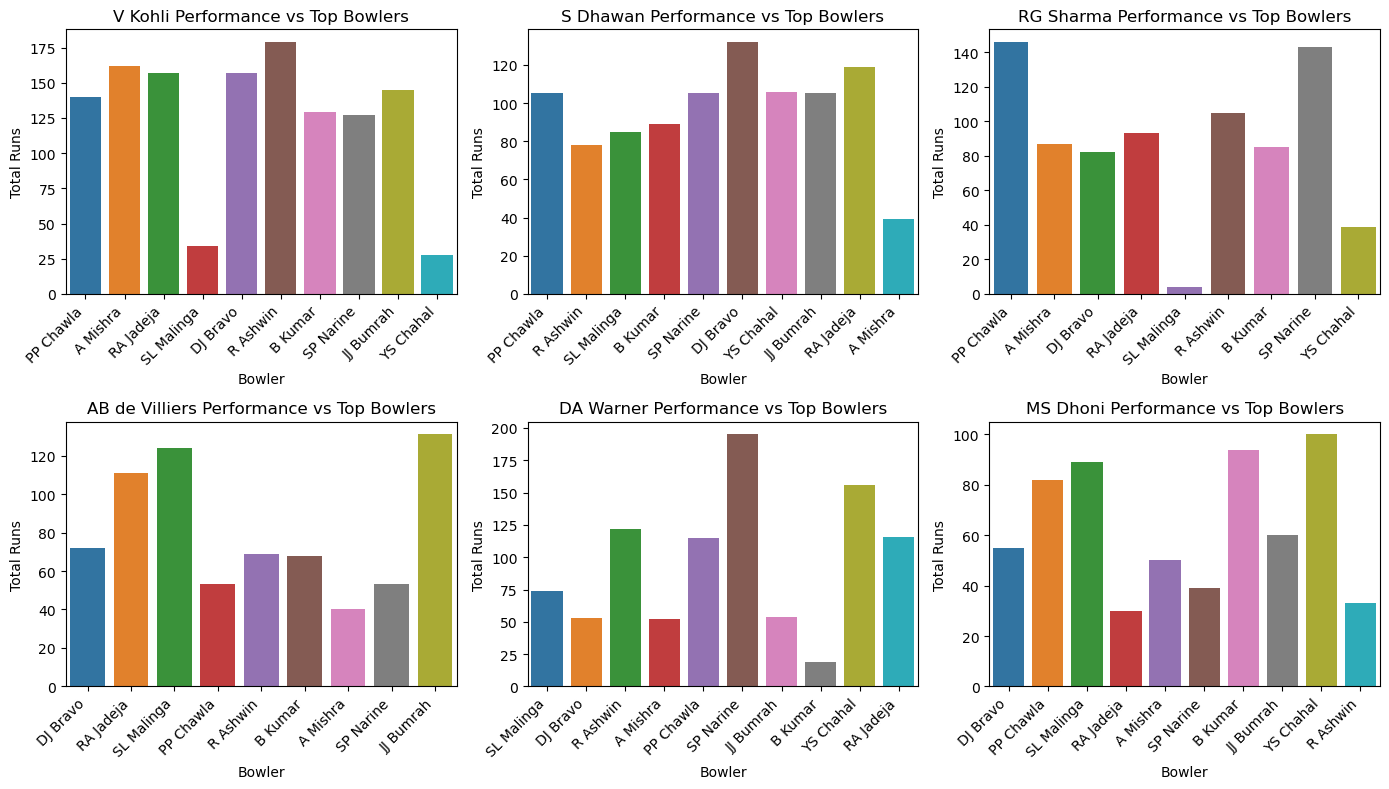

In [35]:
# Plotting for the top batters and top bowlers
plt.figure(figsize=(14, 8))

# Loop through each top batter to plot their performance against the top bowlers
for i, batter in enumerate(top_batters):
    batter_data = top_bowler_data[top_bowler_data['batter'] == batter]
    
    # Check if there is data for the batter
    if not batter_data.empty:
        # Create a subplot for each batter
        plt.subplot(2, 3, i + 1)
        sns.barplot(x='bowler', y='batsman_runs', data=batter_data, estimator='sum', ci=None)

        plt.title(f'{batter} Performance vs Top Bowlers')
        plt.xlabel('Bowler')
        plt.ylabel('Total Runs')
        plt.xticks(rotation=45, ha='right')
    else:
        print(f"No data available for {batter}. Skipping plot.")

    plt.tight_layout()

plt.show()


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Preparing the data
X = data[['batsman_runs', 'total_runs', 'is_wicket', 'over']]
y = data['batsman_runs']  # This is the target (runs scored by the batter)

# Splitting data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error for predicted runs: {mae}')


Mean Absolute Error for predicted runs: 1.1114517859880424e-05


        Feature  Importance
0  batsman_runs    0.999335
1    total_runs    0.000665
2     is_wicket    0.000000
3          over    0.000000


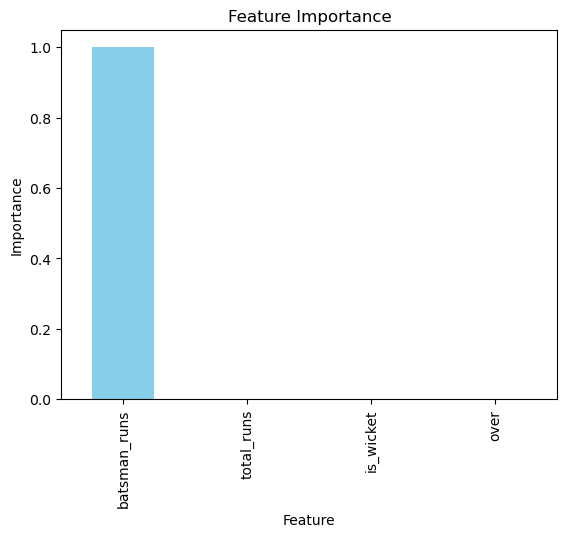

In [37]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)

# Plot the feature importance
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', color='skyblue', legend=False)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


In [39]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (mean score across folds)
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Calculate mean and standard deviation of the cross-validation MAE
print(f"Cross-validation Mean MAE: {-cross_val_scores.mean()}")
print(f"Cross-validation Standard Deviation of MAE: {cross_val_scores.std()}")


Cross-validation Mean MAE: 1.8013184117737246e-06
Cross-validation Standard Deviation of MAE: 3.602636823547449e-06


In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# R-squared
r2 = r2_score(y_test, predictions)

# MSE and RMSE
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


R-squared: 0.9999982095493032
Mean Squared Error: 4.79074045684501e-06
Root Mean Squared Error: 0.0021887760179710052


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split with scaled features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model again with scaled features
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [47]:
from sklearn.linear_model import Ridge

# Train the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the performance
mae_ridge = mean_absolute_error(y_test, ridge_predictions)
r_squared_ridge = ridge_model.score(X_test, y_test)
print(f'Ridge Model - Mean Absolute Error: {mae_ridge}')
print(f'Ridge Model - R-squared: {r_squared_ridge}')


Ridge Model - Mean Absolute Error: 1.3721024439631413e-05
Ridge Model - R-squared: 0.9999999995206612


In [52]:
import pandas as pd
top_batters = pd.DataFrame({'batter': top_batters})



In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


predictions = []

for batter in top_batters['batter']:
    batter_data = top_batters_data[top_batters_data['batter'] == batter]
    
 
    yearly_runs = batter_data.groupby('match_year').agg(
        total_runs=('batsman_runs', 'sum'),
        matches_played=('match_id', 'nunique')
    ).reset_index()
    
    yearly_runs['average_runs_per_match'] = yearly_runs['total_runs'] / yearly_runs['matches_played']
    
    
    X = yearly_runs[['match_year']]
    y = yearly_runs['average_runs_per_match']
    
  
    if len(X) < 2: 
        print(f"Skipping {batter} due to insufficient data.")
        continue
    
    
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    except ValueError:
        
        X_train, X_test, y_train, y_test = X, X, y, y

 
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    
    future_year = [[max(X['match_year']) + 1]]  
    future_pred = model.predict(future_year)
    
 
    if len(X_test) > 0:
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
    else:
        mae, r2 = None, None  
    
    predictions.append({
        'Batter': batter,
        'Predicted Runs for Next Year': future_pred[0],
        'Mean Absolute Error': mae,
        'R-squared': r2
    })


for pred in predictions:
    print(f"{pred['Batter']} - Predicted Runs for Next Year: {pred['Predicted Runs for Next Year']:.2f}")
    if pred['Mean Absolute Error'] is not None:
        print(f"Mean Absolute Error: {pred['Mean Absolute Error']:.4f}")
        print(f"R-squared: {pred['R-squared']:.4f}")
    else:
        print("Not enough data to calculate error metrics.")
    print('-' * 50)


Skipping AB de Villiers due to insufficient data.
Skipping DA Warner due to insufficient data.
Skipping MS Dhoni due to insufficient data.
V Kohli - Predicted Runs for Next Year: 37.81
Mean Absolute Error: 10.5414
R-squared: 0.3620
--------------------------------------------------
S Dhawan - Predicted Runs for Next Year: 35.72
Mean Absolute Error: 5.1685
R-squared: 0.2069
--------------------------------------------------
RG Sharma - Predicted Runs for Next Year: 25.77
Mean Absolute Error: 4.3586
R-squared: 0.1277
--------------------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
